<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Настройки-и-загрузка-данных" data-toc-modified-id="Настройки-и-загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Настройки и загрузка данных</a></span></li><li><span><a href="#Знакомство-с-данными/-изучение" data-toc-modified-id="Знакомство-с-данными/-изучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Знакомство с данными/ изучение</a></span></li><li><span><a href="#АА-тест-по-вакансиям" data-toc-modified-id="АА-тест-по-вакансиям-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>АА-тест по вакансиям</a></span></li></ul></div>

## Настройки и загрузка данных

In [1]:
import pandas as pd
import numpy as np
import uuid
import zlib
import random
import itertools
import math

from sqlalchemy import create_engine, text
from os import getenv
from ch_http_client import getDF

import warnings
from urllib.parse import unquote
from time import sleep
import requests
import datetime as dt
import re
from pandas. tseries.offsets import DateOffset, MonthBegin
from collections import defaultdict
from itertools import combinations

import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from tqdm.notebook import tqdm
from pqdm.threads import pqdm
import plotly.express as px

from scipy import stats 
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.proportion import proportions_chisquare
from sklearn.model_selection import train_test_split
from statsmodels.stats.multitest import multipletests

In [2]:
serps = pd.read_csv('serps.csv', index_col = 0).reset_index()

In [3]:
serps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2431596 entries, 0 to 2431595
Data columns (total 4 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   request_id       object
 1   vacancy_id_conv  int64 
 2   city             object
 3   applicant        int64 
dtypes: int64(2), object(2)
memory usage: 74.2+ MB


In [4]:
serps

,request_id,vacancy_id_conv,city,applicant
0,168719525526659303f2dee867dc6eda,48019,Moscow,78076
1,168719525526659303f2dee867dc6eda,45120,Moscow,614859
2,168719525526659303f2dee867dc6eda,18132,Moscow,175212
3,168719525526659303f2dee867dc6eda,29942,Moscow,322643
4,168719525526659303f2dee867dc6eda,32658,Moscow,722260
...,...,...,...,...
2431591,16871839548434b4f62891daa5d10fd3,1102,Samara,156365
2431592,1687164459878871f4f0832e5fb53b5f,5170,Samara,615232
2431593,1687153595384444d2da11ecd811f7c4,8001,Samara,478614
2431594,168716903797271e492f2306df102cf8,28428,Samara,901182


1. request_id — идентификатор serp’а
2. vacancy_id_conv  — идентификатор вакансии
3. city — город пользователя, в котором он ищет работу
4. applicant —  id соискателя, который видит SERP и может откликнуться на вакансию

In [5]:
vacs_metrics = pd.read_csv('vacs_metrics.csv', index_col=0).reset_index()

In [6]:
vacs_metrics

,vacancy_id_conv,metric_full,emplpyer_id
0,1,5.250818,640
1,2,5.808587,5123
2,3,2.830297,3325
3,4,5.179469,3511
4,5,5.457955,6604
...,...,...,...
55495,58338,2.825501,1900
55496,58339,0.842977,2173
55497,58342,-0.628653,1110
55498,58343,1.892471,9611


1. vacancy_id_conv — идентификатор вакансии
2. metrics_full — это как раз и есть скор
3. emplpyer_id — id работодателя, запостившего вакансию

## Знакомство с данными/ изучение

In [7]:
df = serps.merge(vacs_metrics, on='vacancy_id_conv', how='left')

In [8]:
df.shape[0], serps.shape[0]

(2431596, 2431596)

In [9]:
df

,request_id,vacancy_id_conv,city,applicant,metric_full,emplpyer_id
0,168719525526659303f2dee867dc6eda,48019,Moscow,78076,3.869807,4815
1,168719525526659303f2dee867dc6eda,45120,Moscow,614859,5.460877,377
2,168719525526659303f2dee867dc6eda,18132,Moscow,175212,3.836248,1063
3,168719525526659303f2dee867dc6eda,29942,Moscow,322643,4.380258,1894
4,168719525526659303f2dee867dc6eda,32658,Moscow,722260,4.741439,4902
...,...,...,...,...,...,...
2431591,16871839548434b4f62891daa5d10fd3,1102,Samara,156365,5.608911,2634
2431592,1687164459878871f4f0832e5fb53b5f,5170,Samara,615232,4.737008,6022
2431593,1687153595384444d2da11ecd811f7c4,8001,Samara,478614,6.048292,4852
2431594,168716903797271e492f2306df102cf8,28428,Samara,901182,4.467457,1218


* сколько поисков приходится на одного пользователя?
* сколько поисков приходится на одну вакансию?
* сколько вакансий приходится на одного пользователя?
* скреднее кол-во вакансий в сепре?

если одна и та же ввакансия показана пользователям из разных городов?



In [10]:
by_user = df.groupby('applicant', as_index=False).agg({'request_id':['nunique', 'count'], 'vacancy_id_conv':['nunique', 'count']})
by_user.columns = ['_'.join(col).strip() for col in by_user.columns.values]

In [11]:
by_user

,applicant_,request_id_nunique,request_id_count,vacancy_id_conv_nunique,vacancy_id_conv_count
0,0,3,3,3,3
1,1,2,2,2,2
2,2,3,3,3,3
3,3,1,1,1,1
4,4,4,4,4,4
...,...,...,...,...,...
911857,999995,3,3,3,3
911858,999996,4,4,4,4
911859,999997,2,2,2,2
911860,999998,4,4,4,4


In [12]:
by_user.query('vacancy_id_conv_nunique!=vacancy_id_conv_count')

,applicant_,request_id_nunique,request_id_count,vacancy_id_conv_nunique,vacancy_id_conv_count
1130,1244,5,5,4,5
1205,1324,3,3,2,3
1612,1780,4,4,3,4
2604,2856,2,2,1,2
2610,2862,4,4,3,4
...,...,...,...,...,...
904772,992174,2,2,1,2
906047,993586,4,4,3,4
908230,996002,3,3,2,3
909791,997714,2,2,1,2


In [13]:
by_user.query('request_id_nunique!=request_id_count')

,applicant_,request_id_nunique,request_id_count,vacancy_id_conv_nunique,vacancy_id_conv_count
197551,216610,4,5,5,5
234750,257328,4,5,5,5
322423,353499,5,6,6,6
394923,432984,4,5,5,5
543569,596084,3,4,4,4
550668,603879,1,2,2,2
798927,876190,6,7,7,7


In [14]:
df.query('applicant==216610')

,request_id,vacancy_id_conv,city,applicant,metric_full,emplpyer_id
1184990,16871870202896c55fff819189671be9,5825,SPb,216610,6.192930,5562
1184991,16871870202896c55fff819189671be9,6076,SPb,216610,4.058914,3902
1477580,168717716121994bcdddd6784e834af1,16302,Kazan,216610,4.425433,3737
2139745,16871762537675b601f98777434ee955,36351,Penza,216610,5.174548,4847
2293027,1687180529604d34c676bcb59f337126,10469,Samara,216610,6.812423,7362


In [15]:
print(f"Среднее/медиана кол-ва поисков на пользователя {round(by_user['request_id_nunique'].mean())} / {by_user['request_id_nunique'].median()}")
print(f"Среднее/медиана кол-ва вакансий во всех поисках на пользователя {round(by_user['vacancy_id_conv_nunique'].mean())} / {by_user['vacancy_id_conv_nunique'].median()}")
print(f"Среднее/медиана кол-ва вакансий на одного работодателя {vacs_metrics.groupby('emplpyer_id').agg({'vacancy_id_conv':'nunique'}).mean().values[0]} / {vacs_metrics.groupby('emplpyer_id').agg({'vacancy_id_conv':'nunique'}).median().values[0]}")
print(f"Кол-во вакансий, на которые откликается пользователи с разных городов {df.groupby('vacancy_id_conv').agg({'city':'nunique'}).query('city>1').shape[0]}")

Среднее/медиана кол-ва поисков на пользователя 3 / 2.0
Среднее/медиана кол-ва вакансий во всех поисках на пользователя 3 / 2.0
Среднее/медиана кол-ва вакансий на одного работодателя 5.571729746009437 / 5.0
Кол-во вакансий, на которые откликается пользователи с разных городов 51517


In [17]:
#  среднее кол-во вакансий в поиске
df.groupby('request_id').agg({'vacancy_id_conv':'nunique'}).mean()

vacancy_id_conv    2.431596
dtype: float64

> Обычно в поиске гораздо больше вакансий. Возможно, это кол-во вакансий, на которые кликнул пользователь или откликнулся на эти вакансии.

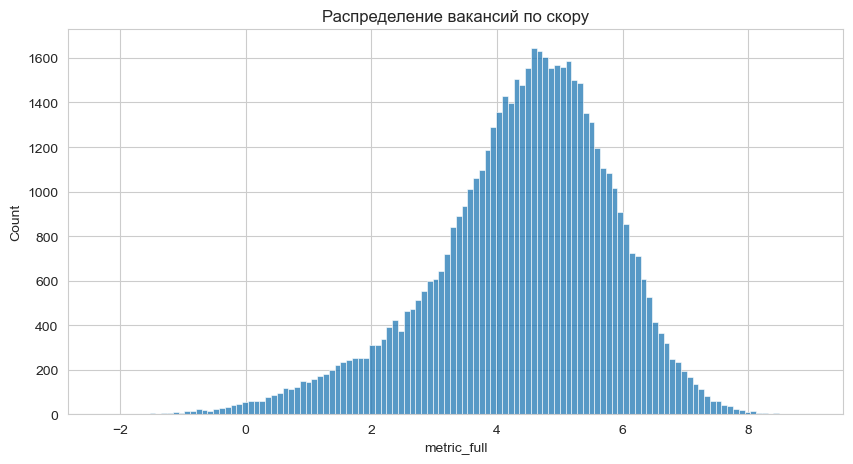

In [18]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
sns.histplot(data=vacs_metrics,
            x='metric_full')
plt.title('Распределение вакансий по скору');

In [19]:
# доля вакансий, у которых скор меньше 3

vacs_metrics.query('metric_full<3')['vacancy_id_conv'].count(),\
vacs_metrics.query('metric_full<3')['vacancy_id_conv'].count() / vacs_metrics['vacancy_id_conv'].count()*100

(8499, 15.313513513513513)

## АА-тест по вакансиям

In [20]:
shape_df = df.shape[0]
pvalues_aa = []
diff_aa = []
vacs = pd.Series(df['vacancy_id_conv'].unique())

for n in tqdm(range(1000)):

    idx_control = vacs.sample(frac=0.5, random_state=n) # пользователи из контрольной группы
    idx_test =  vacs[~vacs.isin(idx_control)] # пользователи из  тестовой группы
    
    # считаем черех хи-квадрат стат.значимость долей
    pvalues_aa.append(proportions_chisquare(
        [df.query('vacancy_id_conv in @idx_control & metric_full<3')['vacancy_id_conv'].nunique(), 
         df.query('vacancy_id_conv in @idx_test & metric_full<3')['vacancy_id_conv'].nunique()], 
        [df.query('vacancy_id_conv in @idx_control')['vacancy_id_conv'].nunique(), 
         df.query('vacancy_id_conv in @idx_test')['vacancy_id_conv'].nunique()])[1]
                     )
    # считаем разницу между метрикой в контрольной и тестовой группах
    rate_control = df.query('vacancy_id_conv in @idx_control & metric_full<3')['vacancy_id_conv'].nunique() \
                    / df.query('vacancy_id_conv in @idx_control')['vacancy_id_conv'].nunique()*100
    rate_test = df.query('vacancy_id_conv in @idx_test & metric_full<3')['vacancy_id_conv'].nunique()\
                    / df.query('vacancy_id_conv in @idx_test')['vacancy_id_conv'].nunique()*100
    diff_aa.append(rate_control-rate_test)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [21]:
# доля прокрасившихся тестов
np.mean([1 if pval<0.05 else 0 for pval in pvalues_aa])

0.057

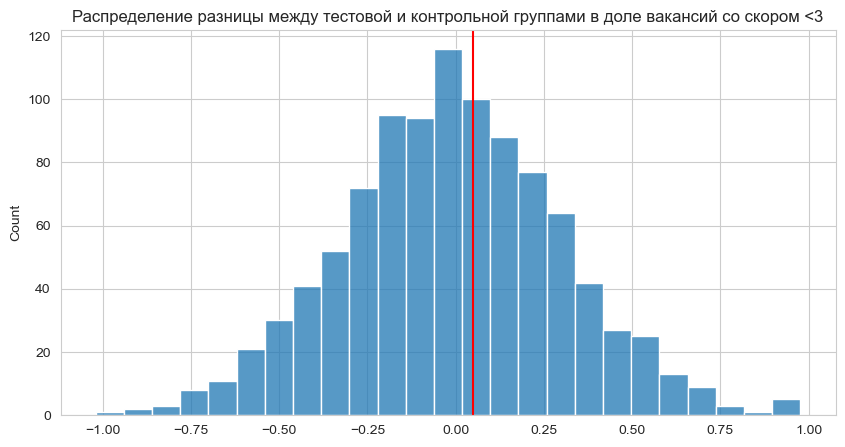

In [22]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
sns.histplot(data=pd.Series(diff_aa))
plt.axvline(x=0.05, color='red')
plt.title('Распределение разницы между тестовой и контрольной группами в доле вакансий со скором <3');
